<a href="https://colab.research.google.com/github/biomedic-ricardo/Top-Personal-Projects/blob/main/Tesis%20clustering%20clients%20with%20K-means%20according%20buying%20ticket%20of%20Soriana%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Listado de las librerias
from google.colab import files
uploaded = files.upload()
import timeit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
!pip install --upgrade kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline



Saving unidades_vendidas.xlsx to unidades_vendidas.xlsx


In [ ]:
# Carga de los documentos
import io
unidades = pd.read_excel(io.BytesIO(uploaded['unidades_vendidas.xlsx'])) 
# Importamos la base y mostramos las primeros y últims 10 registros
unidades.head()

,Fecha,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas
0,2015-01,44743,9847,9595,14680,8410,13982
1,2015-02,38178,9794,9867,15888,9617,11974
2,2015-03,44955,11208,10149,16868,9460,13881
3,2015-04,42125,8137,8081,14657,8917,12463
4,2015-05,30074,7933,7254,12841,7015,12023


In [ ]:
unidades.tail()

,Fecha,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas
67,2020-08,37517,7999,9426,10504,6119,13121
68,2020-09,42804,7182,7423,9725,5978,13539
69,2020-10,39077,7770,6581,10414,7980,14427
70,2020-11,42349,8656,7559,12291,7179,12629
71,2020-12,70582,9161,6462,12916,9300,13633


In [ ]:
unidades.info() 
# Revisamos el tipo de datos y el tamaño de nuestra base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Fecha                             72 non-null     object
 1   panaderia                         72 non-null     int64 
 2   cafes_leches_saborizantes         72 non-null     int64 
 3   cereales_galletas_y_pan           72 non-null     int64 
 4   comestibles_en_general_abarrotes  72 non-null     int64 
 5   dulces_chocolates_botanas         72 non-null     int64 
 6   aceites_granos_y_sopas            72 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


In [ ]:
df = unidades
df

,Fecha,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas
0,2015-01,44743,9847,9595,14680,8410,13982
1,2015-02,38178,9794,9867,15888,9617,11974
2,2015-03,44955,11208,10149,16868,9460,13881
3,2015-04,42125,8137,8081,14657,8917,12463
4,2015-05,30074,7933,7254,12841,7015,12023
...,...,...,...,...,...,...,...
67,2020-08,37517,7999,9426,10504,6119,13121
68,2020-09,42804,7182,7423,9725,5978,13539
69,2020-10,39077,7770,6581,10414,7980,14427
70,2020-11,42349,8656,7559,12291,7179,12629


In [ ]:
#Cambiamos el formato de fecha a tipo datetime (año-mes-dia) ya que aparece como tipo object                         
unidades['Fecha'] = pd.to_datetime(unidades['Fecha'], format='%Y-%m')     

In [ ]:
unidades.info() #Se corroboro el cambio de formato de la dimensión fecha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Fecha                             72 non-null     datetime64[ns]
 1   panaderia                         72 non-null     int64         
 2   cafes_leches_saborizantes         72 non-null     int64         
 3   cereales_galletas_y_pan           72 non-null     int64         
 4   comestibles_en_general_abarrotes  72 non-null     int64         
 5   dulces_chocolates_botanas         72 non-null     int64         
 6   aceites_granos_y_sopas            72 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.1 KB


In [ ]:
unidades.tail()

,Fecha,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas
67,2020-08-01,37517,7999,9426,10504,6119,13121
68,2020-09-01,42804,7182,7423,9725,5978,13539
69,2020-10-01,39077,7770,6581,10414,7980,14427
70,2020-11-01,42349,8656,7559,12291,7179,12629
71,2020-12-01,70582,9161,6462,12916,9300,13633


In [ ]:
df['mes'] = df['Fecha'].dt.month  
df['año'] = df['Fecha'].dt.year 


In [ ]:
df = df.drop(['Fecha'], axis=1)
df1= df.drop(['cafes_leches_saborizantes','cereales_galletas_y_pan','comestibles_en_general_abarrotes','dulces_chocolates_botanas',
              'aceites_granos_y_sopas'], axis=1)
df2= df.drop(['panaderia','cereales_galletas_y_pan','comestibles_en_general_abarrotes','dulces_chocolates_botanas','aceites_granos_y_sopas'],
             axis=1)
df3= df.drop(['panaderia','cafes_leches_saborizantes','comestibles_en_general_abarrotes','dulces_chocolates_botanas','aceites_granos_y_sopas'],
             axis=1)
df4= df.drop(['panaderia','cafes_leches_saborizantes','cereales_galletas_y_pan','dulces_chocolates_botanas','aceites_granos_y_sopas'],
             axis=1)
df5= df.drop(['panaderia','cafes_leches_saborizantes','cereales_galletas_y_pan','comestibles_en_general_abarrotes','aceites_granos_y_sopas'],
             axis=1)
df6= df.drop(['panaderia','cafes_leches_saborizantes','cereales_galletas_y_pan','comestibles_en_general_abarrotes','dulces_chocolates_botanas'],
             axis=1)

In [ ]:
unidades.set_index('Fecha', inplace=True) #Indexamos las fechas para poder realizar agrupaciones en un futuro

In [ ]:
unidades = unidades.drop(['mes','año'], axis= 1)

In [ ]:
unidades.isnull().sum() #Comprobamos que no existan valores nulos

panaderia                           0
cafes_leches_saborizantes           0
cereales_galletas_y_pan             0
comestibles_en_general_abarrotes    0
dulces_chocolates_botanas           0
aceites_granos_y_sopas              0
dtype: int64

In [ ]:
print(f'Dimensiones de las unidades vendidas : {unidades.shape}') 
#Contamos el número de dimensiones despues de realizar la indexación

Dimensiones de las unidades vendidas : (72, 6)


In [ ]:
unidades.describe()

,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,40611.527778,11992.277778,10122.013889,16052.125000,8877.638889,19532.500000
std,10235.273993,7426.929123,3691.478587,5329.853963,1720.675983,11348.439782
min,28512.000000,6875.000000,6462.000000,9725.000000,5978.000000,9206.000000
25%,35435.750000,8783.250000,8077.250000,13194.000000,7653.500000,13759.750000
50%,37812.000000,9766.500000,9073.000000,14738.000000,8712.500000,16185.500000
75%,42318.250000,10797.250000,9918.750000,16380.000000,9337.250000,20500.000000
max,79996.000000,46291.000000,23119.000000,40108.000000,14708.000000,68014.000000


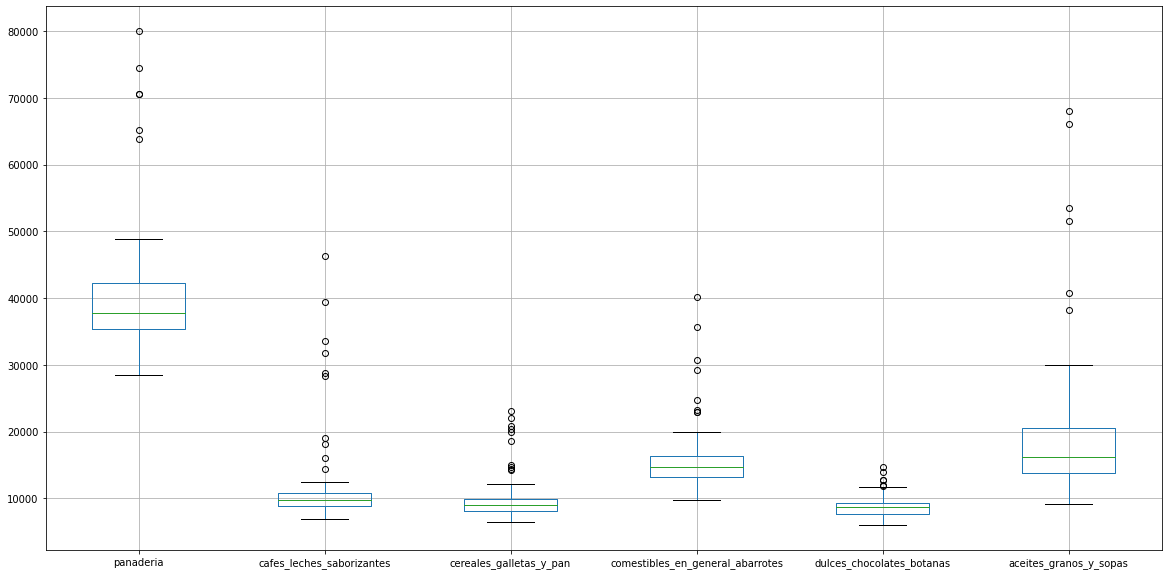

In [ ]:
boxplot = unidades.boxplot(column=['panaderia', 'cafes_leches_saborizantes', 'cereales_galletas_y_pan',
                                   'comestibles_en_general_abarrotes','dulces_chocolates_botanas',
                                   'aceites_granos_y_sopas'], figsize=(20,10))

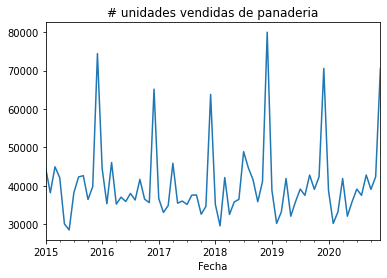

In [ ]:
unidades.panaderia.plot(title='# unidades vendidas de panaderia')
plt.show()

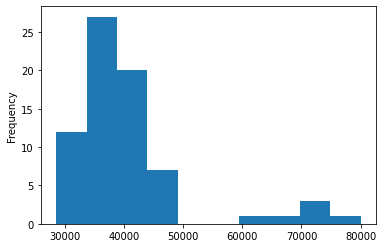

In [ ]:
unidades['panaderia'].plot.hist()

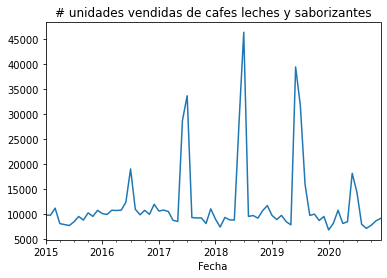

In [ ]:
unidades.cafes_leches_saborizantes.plot(title='# unidades vendidas de cafes leches y saborizantes')
plt.show()

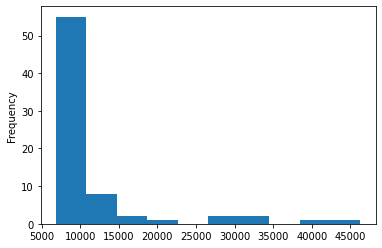

In [ ]:
unidades['cafes_leches_saborizantes'].plot.hist()

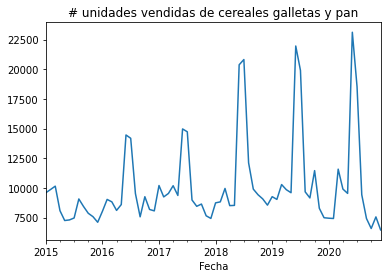

In [ ]:
unidades.cereales_galletas_y_pan.plot(title='# unidades vendidas de cereales galletas y pan')
plt.show()

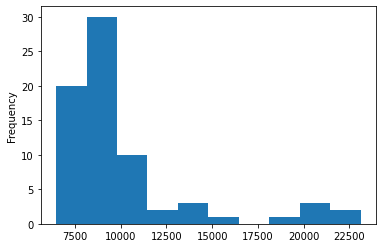

In [ ]:
unidades['cereales_galletas_y_pan'].plot.hist()

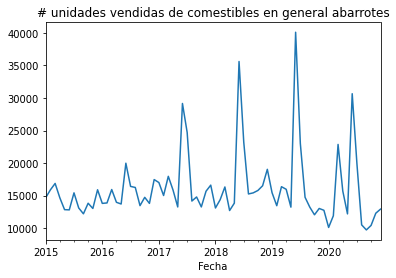

In [ ]:
unidades.comestibles_en_general_abarrotes.plot(title='# unidades vendidas de comestibles en general abarrotes')
plt.show()

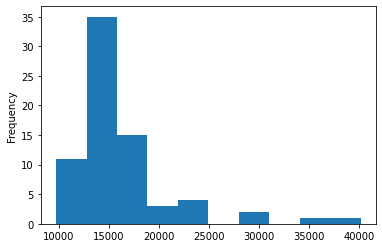

In [ ]:
unidades['comestibles_en_general_abarrotes'].plot.hist()

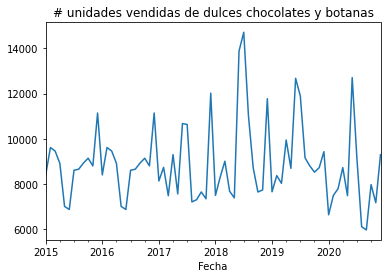

In [ ]:
unidades.dulces_chocolates_botanas.plot(title='# unidades vendidas de dulces chocolates y botanas')
plt.show()

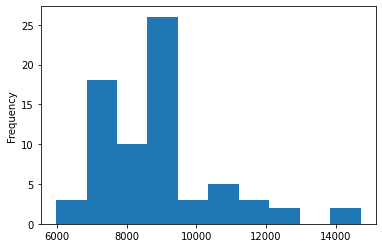

In [ ]:
unidades['dulces_chocolates_botanas'].plot.hist() 

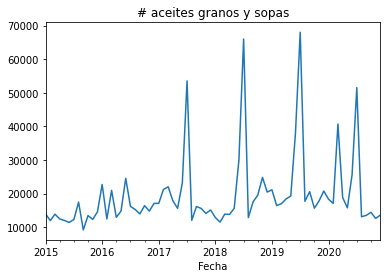

In [ ]:
unidades.aceites_granos_y_sopas.plot(title='# aceites granos y sopas')
plt.show()

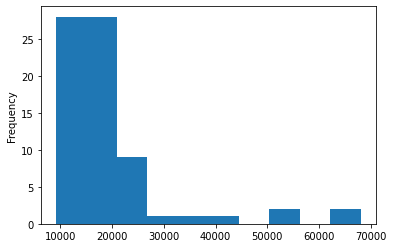

In [ ]:
unidades['aceites_granos_y_sopas'].plot.hist() 

In [ ]:
df1

,panaderia,mes,año
0,44743,1,2015
1,38178,2,2015
2,44955,3,2015
3,42125,4,2015
4,30074,5,2015
...,...,...,...
67,37517,8,2020
68,42804,9,2020
69,39077,10,2020
70,42349,11,2020


In [ ]:
df1 = df1.pivot(index="mes", columns="año", values="panaderia")
df2 = df2.pivot(index="mes", columns="año", values="cafes_leches_saborizantes")
df3 = df3.pivot(index="mes", columns="año", values="cereales_galletas_y_pan")
df4 = df4.pivot(index="mes", columns="año", values="comestibles_en_general_abarrotes")
df5 = df5.pivot(index="mes", columns="año", values="dulces_chocolates_botanas")
df6 = df6.pivot(index="mes", columns="año", values="aceites_granos_y_sopas")

In [ ]:
df1

año,2015,2016,2017,2018,2019,2020
mes,,,,,,
1,44743,44473,36671,35215,38814,38814
2,38178,35324,33069,29564,30198,30198
3,44955,46071,34849,42153,33209,33209
4,42125,35228,45875,32542,41898,41898
5,30074,37046,35473,35786,32089,32089
6,28512,35920,36029,36482,35848,35848
7,38203,38007,35144,48886,39147,39147
8,42308,36305,37574,44677,37517,37517
9,42647,41683,37617,41574,42804,42804


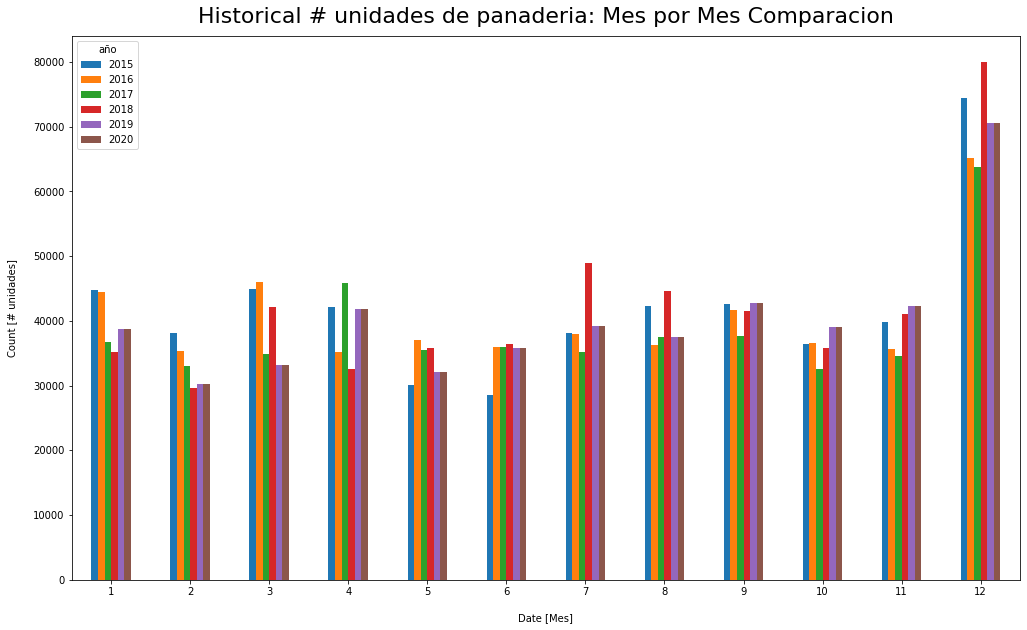

In [ ]:
df1.plot(kind='bar', figsize=(17, 10), rot=0)
plt.title("Historical # unidades de panaderia: Mes por Mes Comparacion", y=1.013, fontsize=22)
plt.xlabel("Date [Mes]", labelpad=16)
plt.ylabel("Count [# unidades]", labelpad=16);   

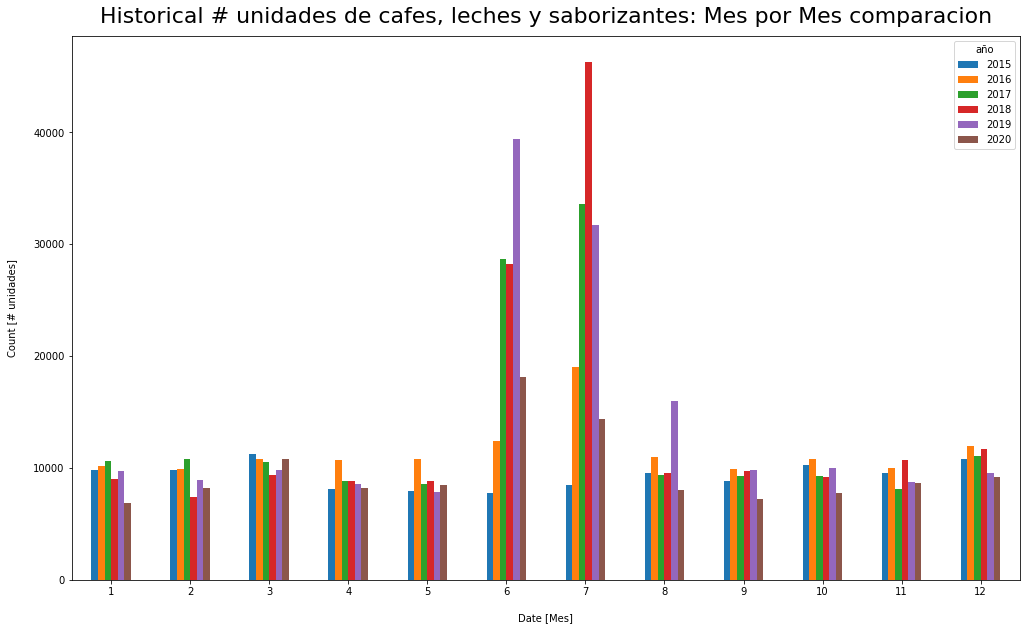

In [ ]:
df2.plot(kind='bar', figsize=(17, 10), rot=0)
plt.title("Historical # unidades de cafes, leches y saborizantes: Mes por Mes comparacion", y=1.013, fontsize=22)
plt.xlabel("Date [Mes]", labelpad=16)
plt.ylabel("Count [# unidades]", labelpad=16);   

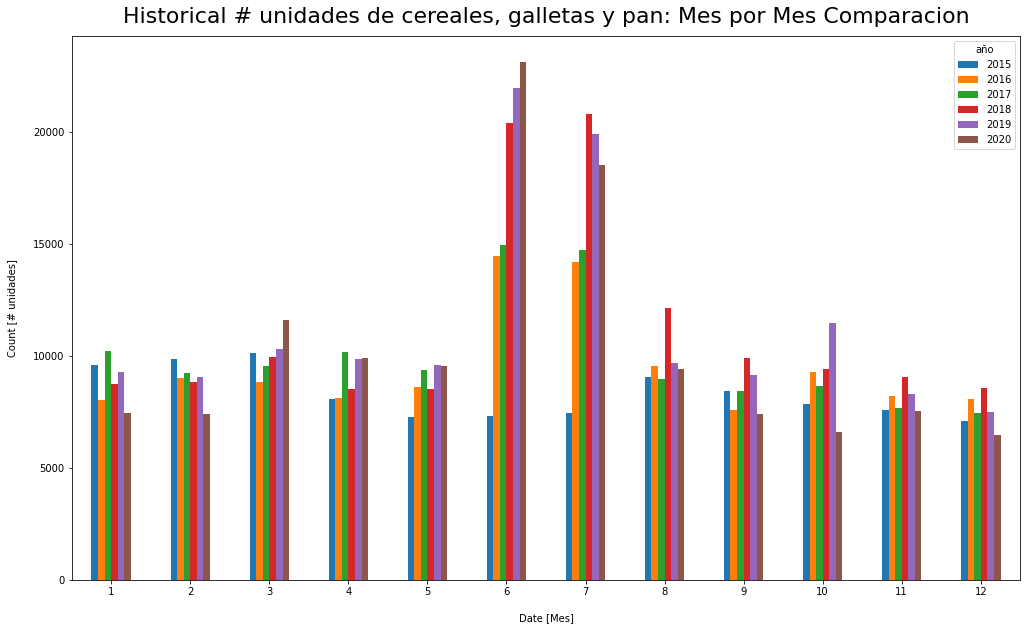

In [ ]:
df3.plot(kind='bar', figsize=(17, 10), rot=0)
plt.title("Historical # unidades de cereales, galletas y pan: Mes por Mes Comparacion", y=1.013, fontsize=22)
plt.xlabel("Date [Mes]", labelpad=16)
plt.ylabel("Count [# unidades]", labelpad=16); 

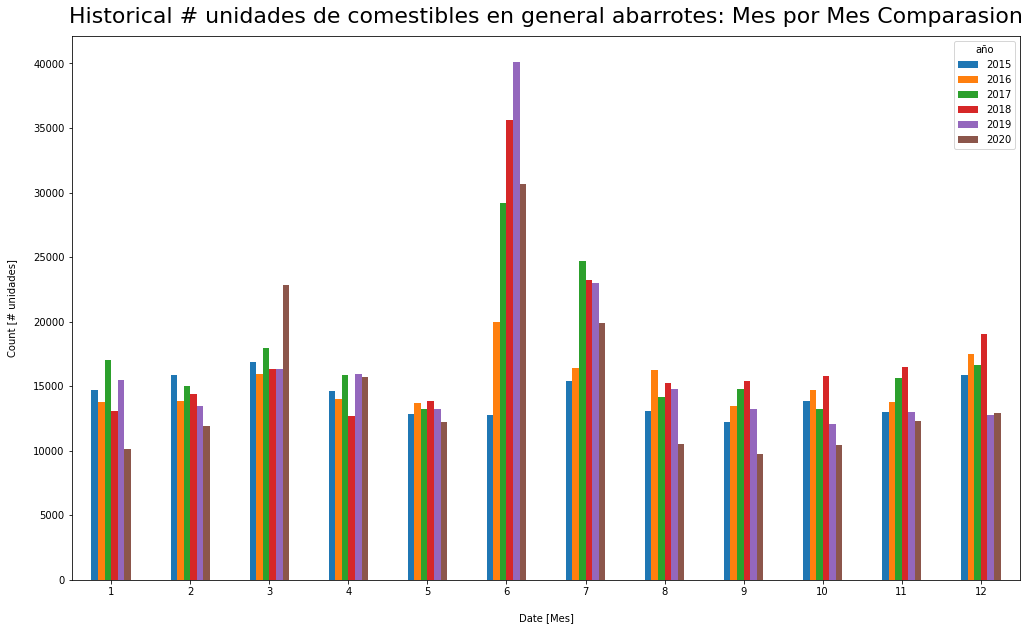

In [ ]:
df4.plot(kind='bar', figsize=(17, 10), rot=0)
plt.title("Historical # unidades de comestibles en general abarrotes: Mes por Mes Comparasion", y=1.013, fontsize=22)
plt.xlabel("Date [Mes]", labelpad=16)
plt.ylabel("Count [# unidades]", labelpad=16); 

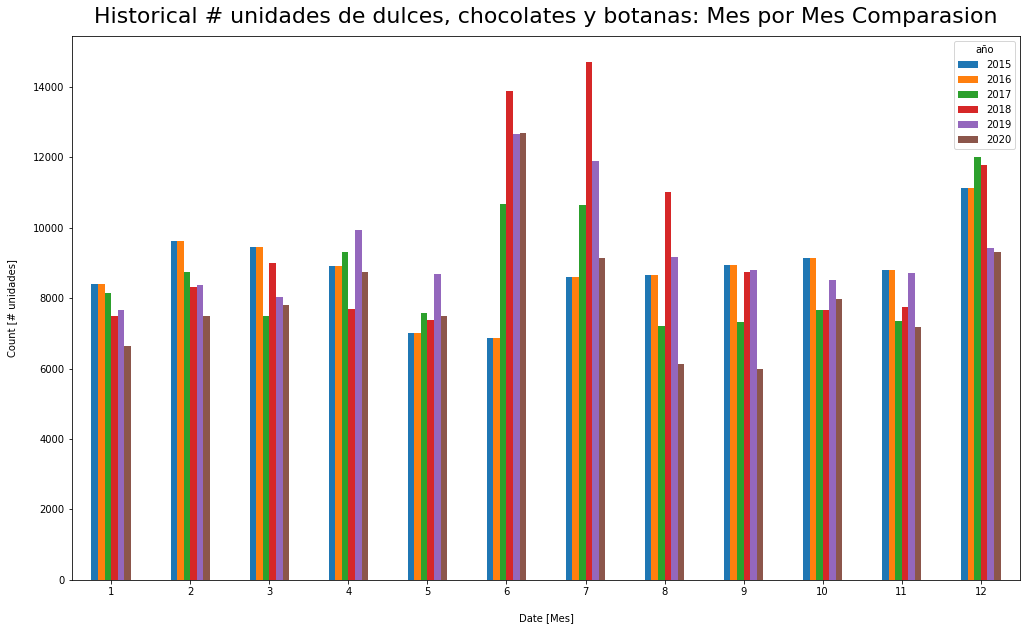

In [ ]:
df5.plot(kind='bar', figsize=(17, 10), rot=0)
plt.title("Historical # unidades de dulces, chocolates y botanas: Mes por Mes Comparasion", y=1.013, fontsize=22)
plt.xlabel("Date [Mes]", labelpad=16)
plt.ylabel("Count [# unidades]", labelpad=16); 

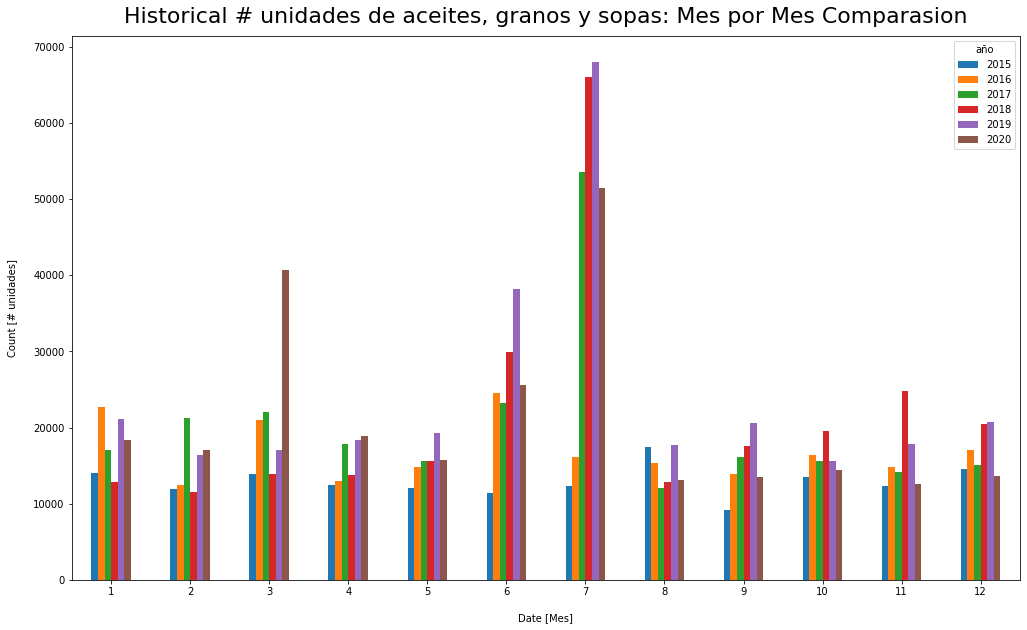

In [ ]:
df6.plot(kind='bar', figsize=(17, 10), rot=0)
plt.title("Historical # unidades de aceites, granos y sopas: Mes por Mes Comparasion", y=1.013, fontsize=22)
plt.xlabel("Date [Mes]", labelpad=16)
plt.ylabel("Count [# unidades]", labelpad=16); 

Text(0.5, 1.013, 'Series temporales del 2015 al 2020')

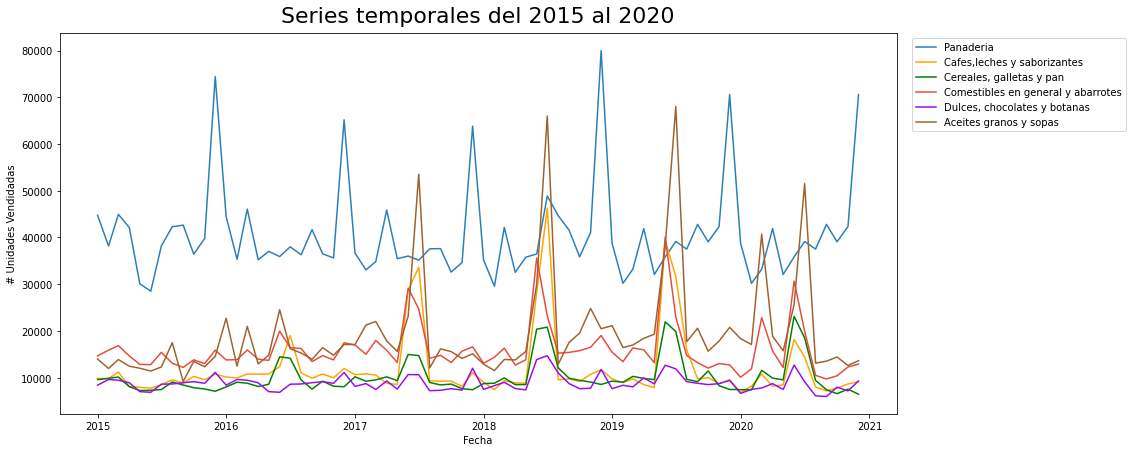

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(unidades.index, 'panaderia', data= unidades, label="Panaderia", color='#2980B9')
plt.plot(unidades.index, 'cafes_leches_saborizantes', data= unidades, label="Cafes,leches y saborizantes", color='orange')
plt.plot(unidades.index, 'cereales_galletas_y_pan', data= unidades, label="Cereales, galletas y pan", color='green')
plt.plot(unidades.index, 'comestibles_en_general_abarrotes', data= unidades, label="Comestibles en general y abarrotes", color='#E74C3C')
plt.plot(unidades.index, 'dulces_chocolates_botanas', data= unidades, label="Dulces, chocolates y botanas", color='#9A0EEA')
plt.plot(unidades.index, 'aceites_granos_y_sopas', data= unidades, label="Aceites granos y sopas", color='#A0622D')
plt.xlabel("Fecha")
plt.ylabel("# Unidades Vendidadas")
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1))
plt.title("Series temporales del 2015 al 2020", y=1.013, fontsize=22)

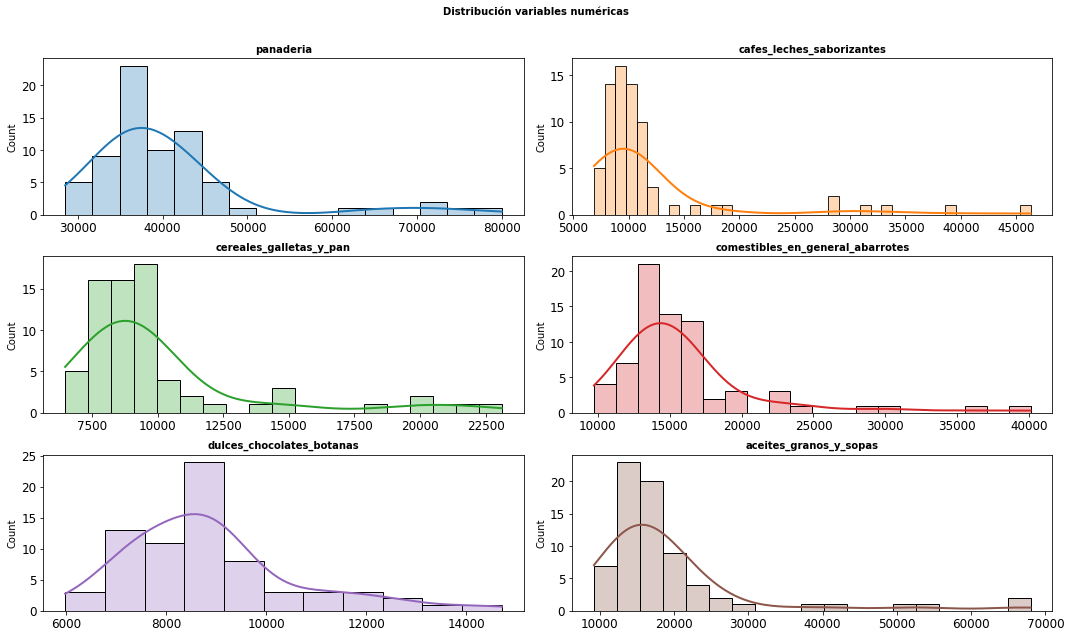

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))
axes = axes.flat
columnas_numeric = unidades.select_dtypes(include=['int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = unidades,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


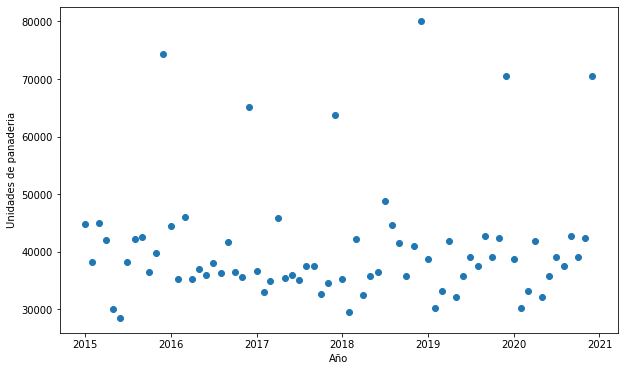

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y = unidades['panaderia'], x = unidades.index)
plt.ylabel("Unidades de panaderia")
plt.xlabel("Año")

plt.show()

Text(0.5, 0, 'Año')

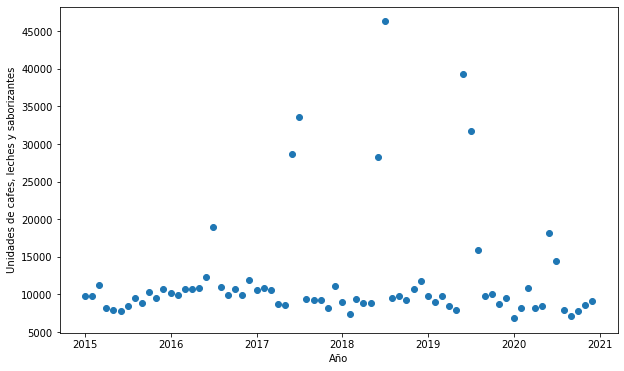

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y = unidades['cafes_leches_saborizantes'], x = unidades.index)
plt.ylabel("Unidades de cafes, leches y saborizantes")
plt.xlabel("Año")

Text(0.5, 0, 'Año')

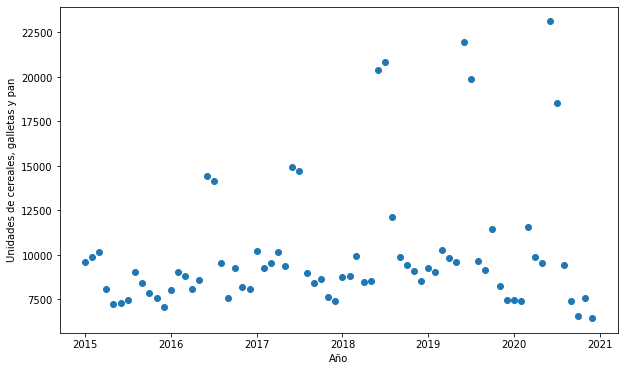

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y = unidades['cereales_galletas_y_pan'], x = unidades.index)
plt.ylabel("Unidades de cereales, galletas y pan")
plt.xlabel("Año")

Text(0.5, 0, 'Año')

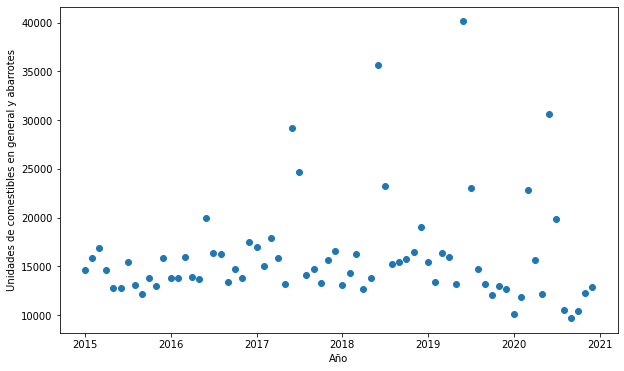

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y = unidades['comestibles_en_general_abarrotes'], x = unidades.index)
plt.ylabel("Unidades de comestibles en general y abarrotes")
plt.xlabel("Año")

Text(0.5, 0, 'Año')

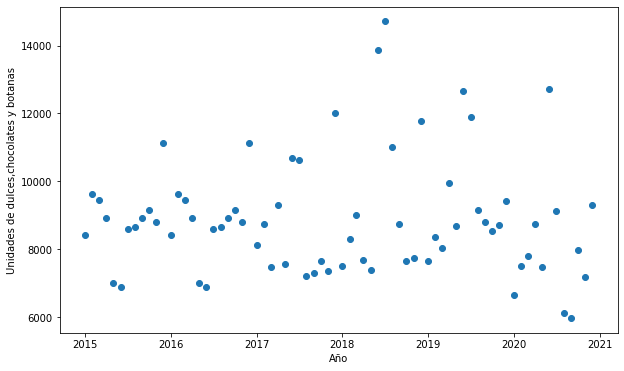

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y = unidades['dulces_chocolates_botanas'], x = unidades.index)
plt.ylabel("Unidades de dulces,chocolates y botanas")
plt.xlabel("Año")

Text(0.5, 0, 'Año')

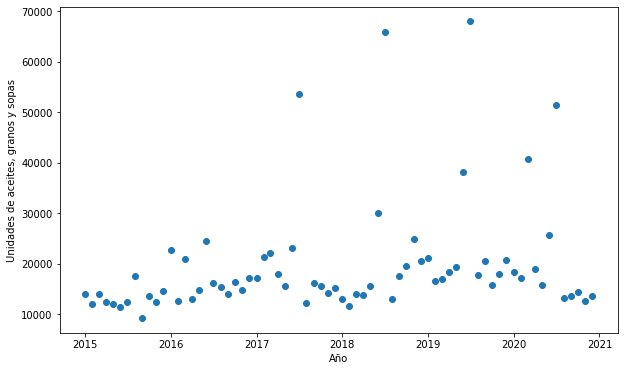

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y = unidades['aceites_granos_y_sopas'], x = unidades.index)
plt.ylabel("Unidades de aceites, granos y sopas")
plt.xlabel("Año")

------------------------------------------------------
Preparación de los datos para PCA y KMeans
------------------------------------------------------

In [ ]:
correlacion_df = df
correlacion_df

,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas,mes,año
0,44743,9847,9595,14680,8410,13982,1,2015
1,38178,9794,9867,15888,9617,11974,2,2015
2,44955,11208,10149,16868,9460,13881,3,2015
3,42125,8137,8081,14657,8917,12463,4,2015
4,30074,7933,7254,12841,7015,12023,5,2015
...,...,...,...,...,...,...,...,...
67,37517,7999,9426,10504,6119,13121,8,2020
68,42804,7182,7423,9725,5978,13539,9,2020
69,39077,7770,6581,10414,7980,14427,10,2020
70,42349,8656,7559,12291,7179,12629,11,2020


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

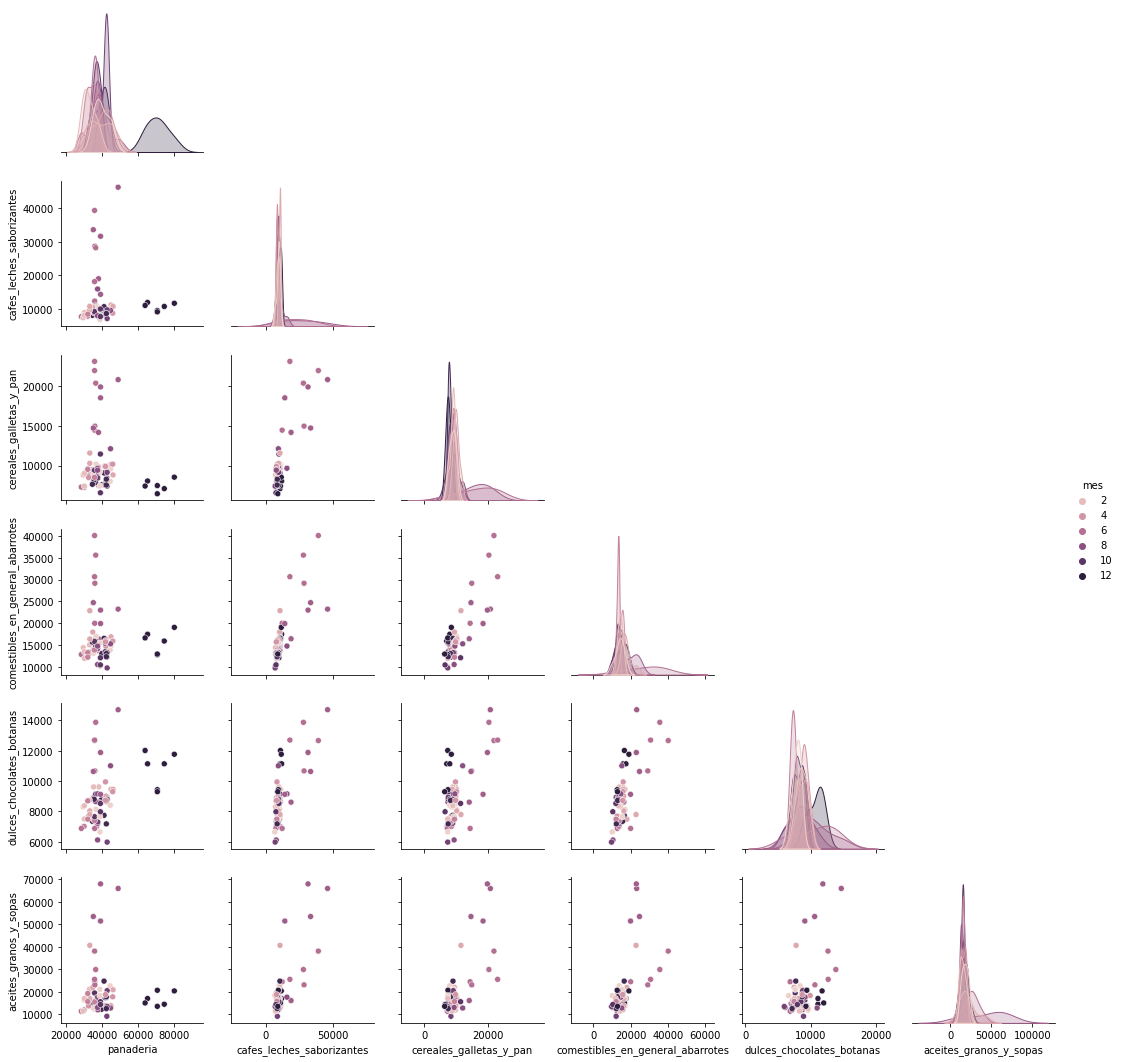

In [ ]:
correlacion_df = correlacion_df.drop(['año'], axis=1)
sns.pairplot(correlacion_df, hue="mes", corner= True)

plt.savefig('correlaciones unidades de productos.png')
files.download("correlaciones unidades de productos.png") 

bibliografía: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
df_normalizada = df
df_normalizada = df_normalizada.drop(['año'], axis=1)
#df_normalizada = df_normalizada.drop(['año','mes'], axis=1)

In [ ]:
df_normalizada

,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas,mes
0,44743,9847,9595,14680,8410,13982,1
1,38178,9794,9867,15888,9617,11974,2
2,44955,11208,10149,16868,9460,13881,3
3,42125,8137,8081,14657,8917,12463,4
4,30074,7933,7254,12841,7015,12023,5
...,...,...,...,...,...,...,...
67,37517,7999,9426,10504,6119,13121,8
68,42804,7182,7423,9725,5978,13539,9
69,39077,7770,6581,10414,7980,14427,10
70,42349,8656,7559,12291,7179,12629,11


In [ ]:
#Normalización del dataset
#df.head()
df_normalizada = (df_normalizada-df_normalizada.min())/(df_normalizada.max()-df_normalizada.min())
#scaler = StandardScaler()
"""df_normalizada[['panaderia','cafes_leches_saborizantes',
                'cereales_galletas_y_pan','comestibles_en_general_abarrotes',
                'dulces_chocolates_botanas','aceites_granos_y_sopas']] = scaler.fit_transform(
                    df[['panaderia','cafes_leches_saborizantes','cereales_galletas_y_pan',
                                         'comestibles_en_general_abarrotes',
                                         'dulces_chocolates_botanas',
                                         'aceites_granos_y_sopas']])
df_normalizada"""


"df_normalizada[['panaderia','cafes_leches_saborizantes',\n                'cereales_galletas_y_pan','comestibles_en_general_abarrotes',\n                'dulces_chocolates_botanas','aceites_granos_y_sopas']] = scaler.fit_transform(\n                    df[['panaderia','cafes_leches_saborizantes','cereales_galletas_y_pan',\n                                         'comestibles_en_general_abarrotes',\n                                         'dulces_chocolates_botanas',\n                                         'aceites_granos_y_sopas']])\ndf_normalizada"

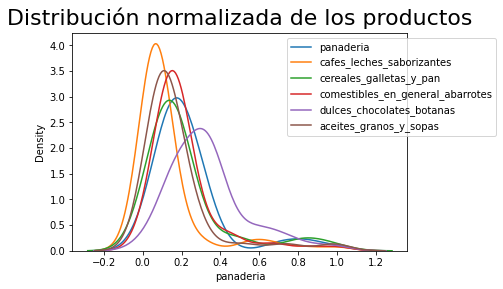

In [ ]:
sns.kdeplot(df_normalizada['panaderia'], label='panaderia')
sns.kdeplot(df_normalizada['cafes_leches_saborizantes'], label='cafes_leches_saborizantes')
sns.kdeplot(df_normalizada['cereales_galletas_y_pan'], label='cereales_galletas_y_pan')
sns.kdeplot(df_normalizada['comestibles_en_general_abarrotes'], label='comestibles_en_general_abarrotes')
sns.kdeplot(df_normalizada['dulces_chocolates_botanas'], label='dulces_chocolates_botanas')
sns.kdeplot(df_normalizada['aceites_granos_y_sopas'], label='aceites_granos_y_sopas')
plt.title("Distribución normalizada de los productos", y=1.013, fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1))
#ax.legend_.set_bbox_to_anchor((0.05, 0.95))
#ax.legend_._set_loc(2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

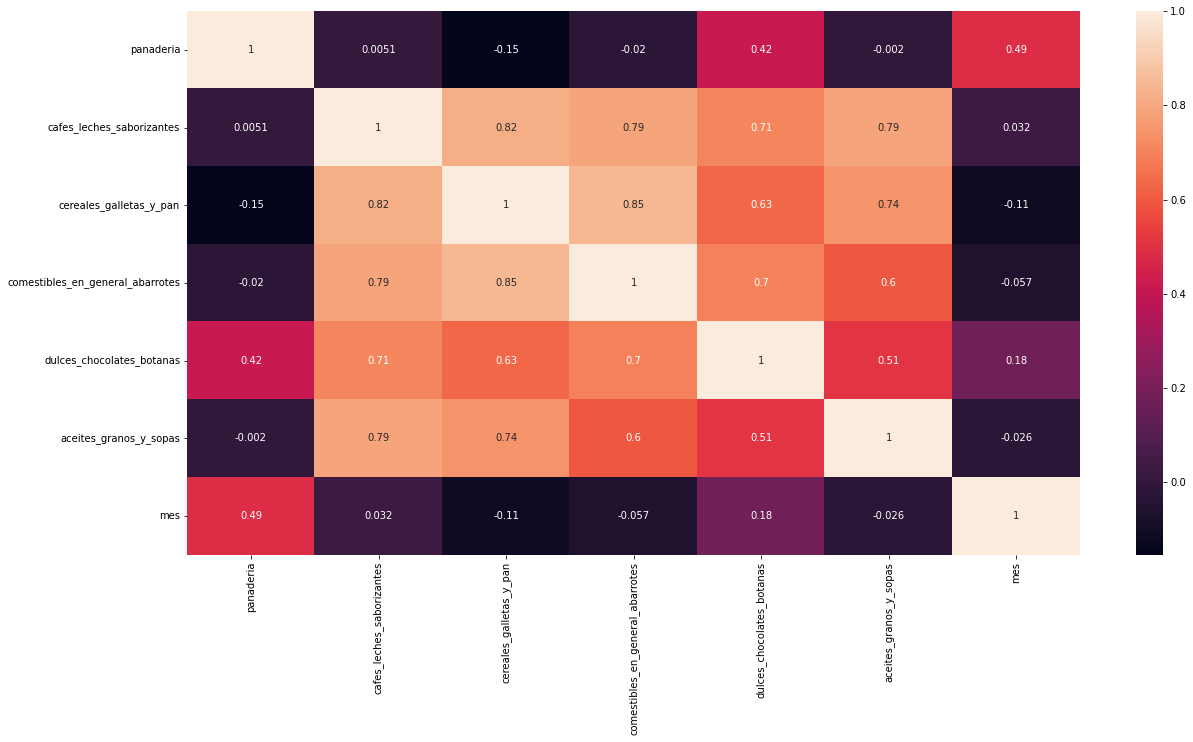

In [ ]:
corr_df = df_normalizada.corr(method='pearson')

plt.figure(figsize=(20, 10))
sns.heatmap(corr_df, annot=True)

plt.savefig('Mapa de calor de las correlaciones unidades de productos.png')
files.download("Mapa de calor de las correlaciones unidades de productos.png") 
plt.show()

In [ ]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df_normalizada.columns:
        for col2 in df_normalizada.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df_normalizada[col],df_normalizada[col2])
            p_matrix[df_normalizada.columns.to_list().index(col),df_normalizada.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(df_normalizada)
mask = np.invert(np.tril(p_values<0.05))

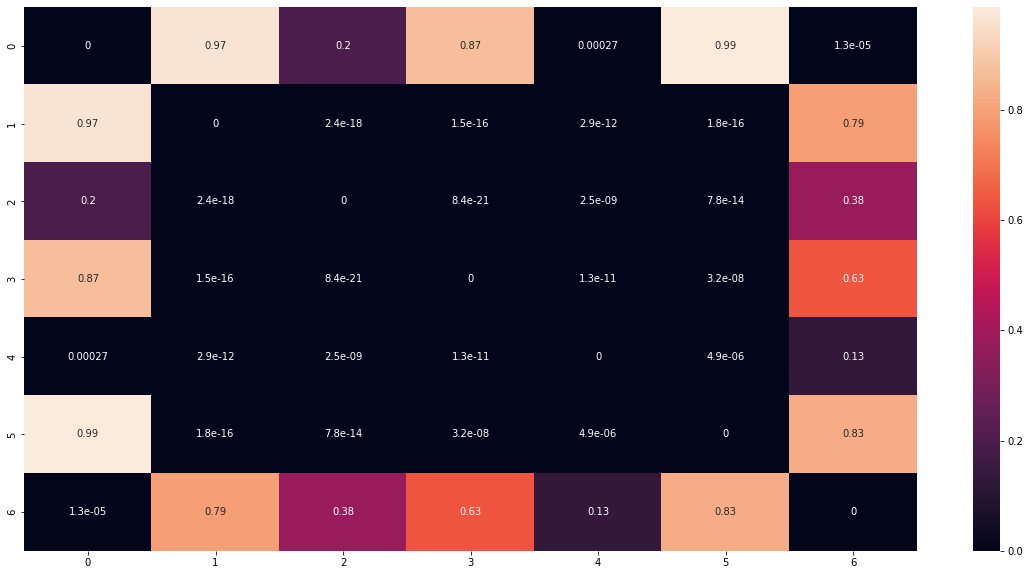

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(p_values, annot=True)

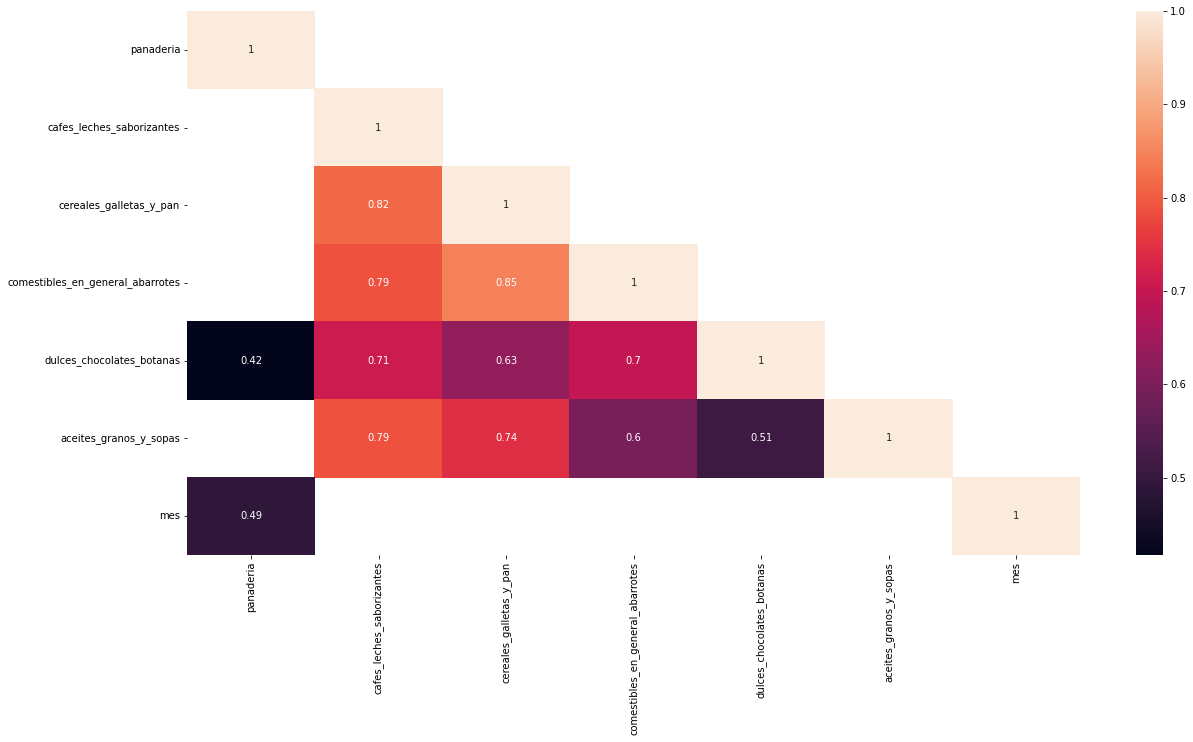

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_df, mask=mask,annot=True)

In [ ]:
###############
"""corr_df


print ('np.corrcoef:', np.corrcoef(df_normalizada))
cor, pval = stats.spearmanr(df_normalizada.T)

print ('stats.spearmanr - cor:\n', cor)
print ('\nstats.spearmanr - pval\n', pval)"""
################
"""
n=6
r=corr_df
t=r*np.sqrt((n-2)/(1-r*r))

stats.t.cdf(t, n-2)

stats.pearsonr(m[:,0], m[:,1])"""

'\nn=6\nr=corr_df\nt=r*np.sqrt((n-2)/(1-r*r))\n\nstats.t.cdf(t, n-2)\n\nstats.pearsonr(m[:,0], m[:,1])'

In [ ]:
correlacion_ordenada = corr_df.unstack().sort_values() 
print("Top 5 correlaciones:\n\n", correlacion_ordenada[-17:-7])

Top 5 correlaciones:

 cereales_galletas_y_pan           aceites_granos_y_sopas              0.743070
aceites_granos_y_sopas            cereales_galletas_y_pan             0.743070
                                  cafes_leches_saborizantes           0.789252
cafes_leches_saborizantes         aceites_granos_y_sopas              0.789252
                                  comestibles_en_general_abarrotes    0.790341
comestibles_en_general_abarrotes  cafes_leches_saborizantes           0.790341
cereales_galletas_y_pan           cafes_leches_saborizantes           0.816365
cafes_leches_saborizantes         cereales_galletas_y_pan             0.816365
cereales_galletas_y_pan           comestibles_en_general_abarrotes    0.846082
comestibles_en_general_abarrotes  cereales_galletas_y_pan             0.846082
dtype: float64


In [ ]:
df_normalizada.describe()

,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas,mes
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.235015,0.129827,0.219728,0.208246,0.332146,0.175597,0.500000
std,0.198805,0.188424,0.221617,0.175422,0.197099,0.192974,0.316025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134484,0.048413,0.096971,0.114176,0.191924,0.077434,0.250000
50%,0.180639,0.073359,0.156751,0.164994,0.313230,0.118683,0.500000
75%,0.268166,0.099509,0.207525,0.219037,0.384794,0.192049,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Rango_de_clusters =[2,3,4,5,6,7]

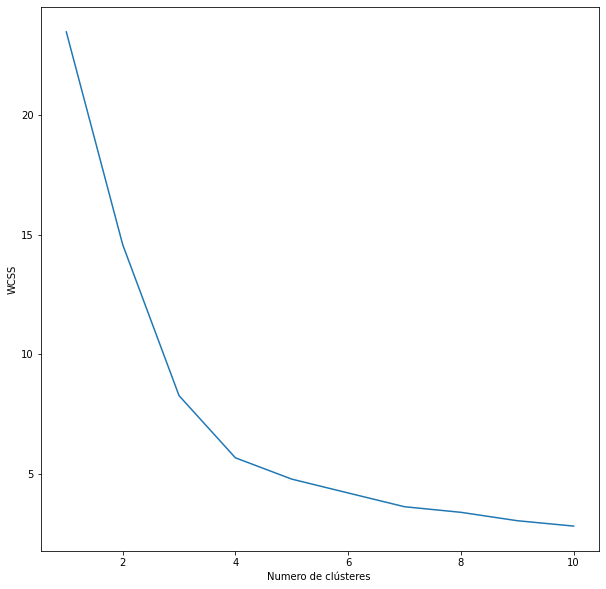

In [ ]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(df_normalizada)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Numero de clústeres ')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kl = KneeLocator(
     range(1, 11), wcss, curve="convex", direction="decreasing"
     )

In [ ]:
print('Cluster optimo con tecnica del codo:',kl.elbow)

Cluster optimo con tecnica del codo: 4


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca_df = pca.fit_transform(df_normalizada)
pca_df_2dimension = pd.DataFrame(data= pca_df, columns=['Componente_1', 'Componente_2'])


In [ ]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.44906314 0.3524293 ]
[0.44906314 0.80149244]


In [ ]:
print(pca.singular_values_)

[3.24798365 2.87737281]


Para cada n_clústeres = 2 TEl valor promedio de la silueta es : 0.6099583301555795
Para cada n_clústeres = 3 TEl valor promedio de la silueta es : 0.5748323649791642
Para cada n_clústeres = 4 TEl valor promedio de la silueta es : 0.587998193683728
Para cada n_clústeres = 5 TEl valor promedio de la silueta es : 0.5018675132053909
Para cada n_clústeres = 6 TEl valor promedio de la silueta es : 0.5051497741049172
Para cada n_clústeres = 7 TEl valor promedio de la silueta es : 0.35987772892397607


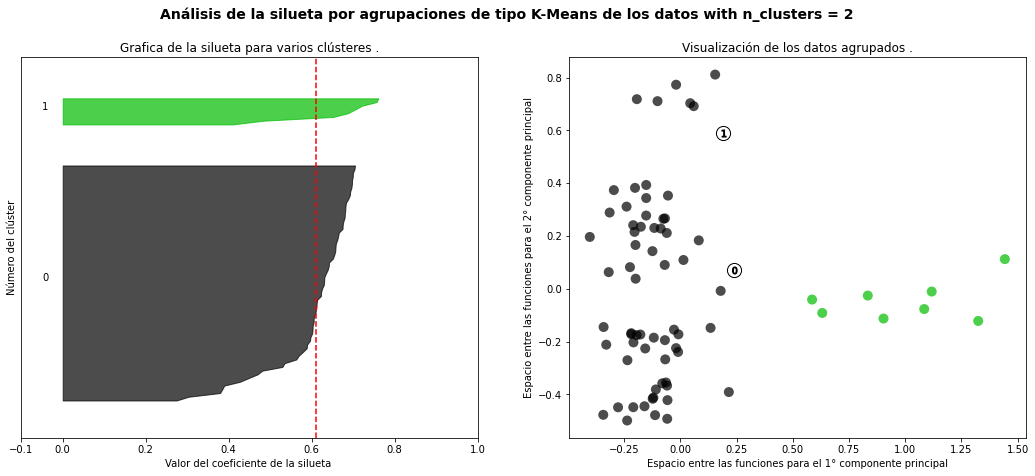

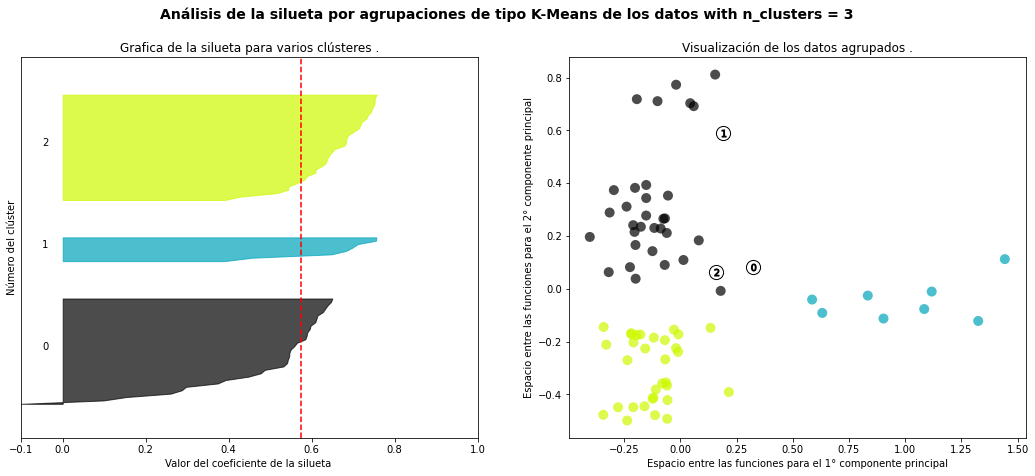

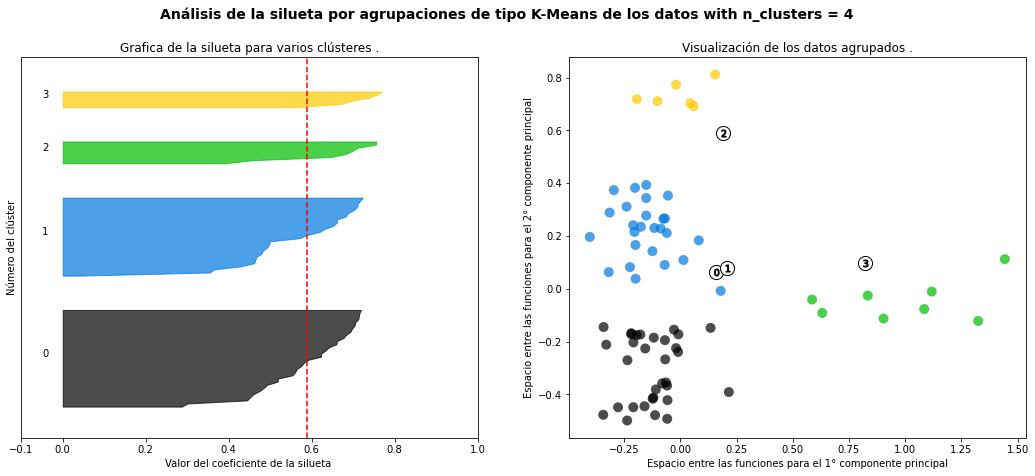

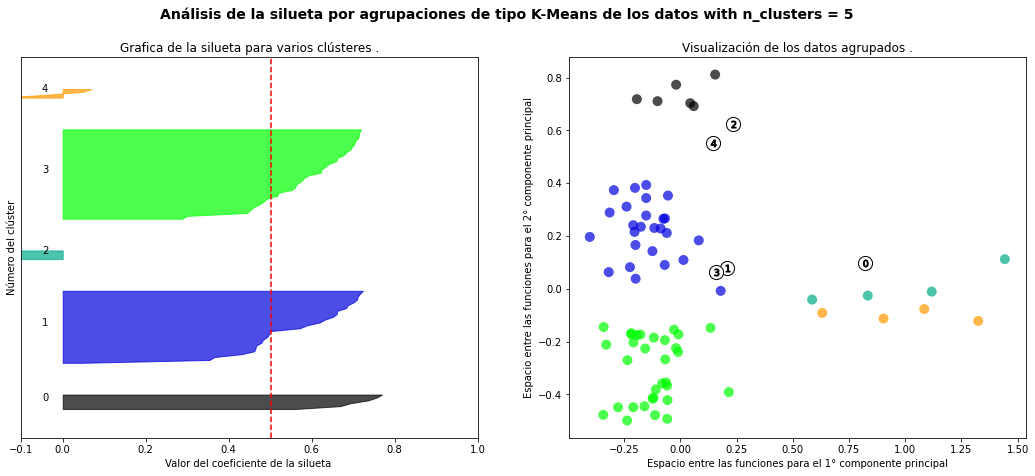

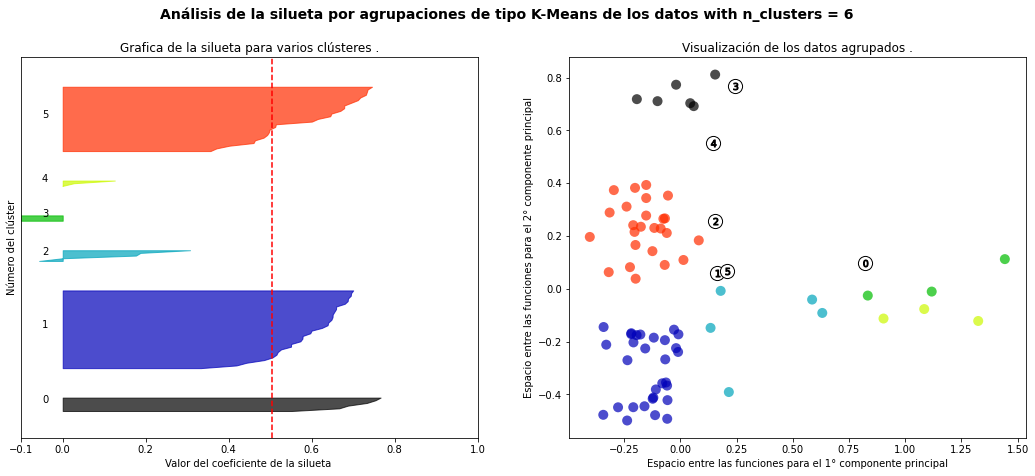

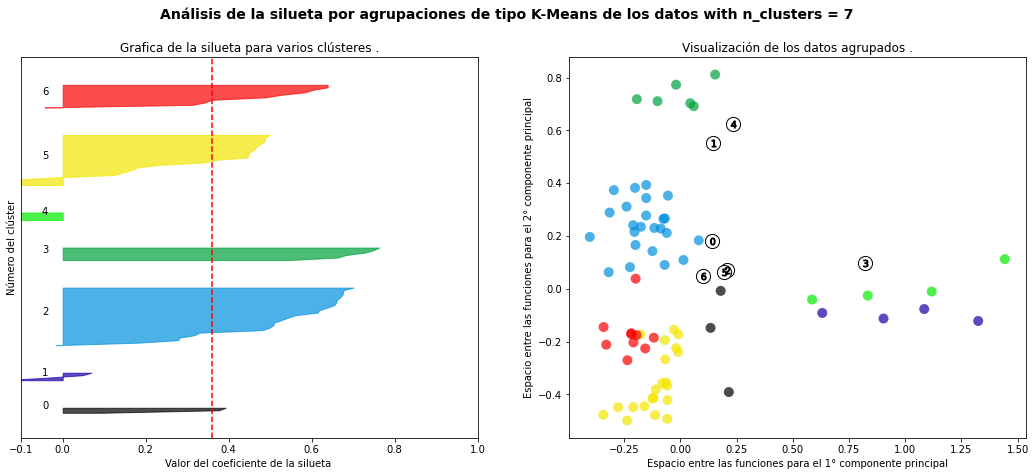

In [ ]:
for n_clusters in Rango_de_clusters:
    # Creación de un subplot con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # El 1er subplot es la grafica de silhouette
    # El coeficiente de silhouette usa un rango de -1 a 1 pero en este ejemplo
    # el rango sera de [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # El (n_clusters+1)*10 es para para insertar un espacio en blanco
    # entre las graficas silhouette de cada cluster para remarcarlos claramente.
    
    ax1.set_ylim([0, len(pca_df_2dimension) + (n_clusters + 1) * 10])

    # Inicializamos el culter con el valor de n_clusters y un generador random
    # La semilla del generador fue 10 para la reproductibilidad.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_normalizada)

    # El puntaje de la silueta o silhouette_score da el valor promedio de todas las muestras.
    # Esto representa la densidad y separación formada por los clusteres

    silhouette_avg = silhouette_score(pca_df_2dimension, cluster_labels)
    print("Para cada n_clústeres =", n_clusters,
          "TEl valor promedio de la silueta es :", silhouette_avg)

    # Computa el puntaje de la silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(pca_df_2dimension, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agrregamos el puntaje de la silhouette para la muestra perteneciente al
        # cluster i, y ordenarlos
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiqueta del grafico silhouette con su número de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Computa el nuevo y_lower para la siguiente grafica
        y_lower = y_upper + 10  # 10 para las 0 muestras

    ax1.set_title("Grafica de la silueta para varios clústeres .")
    ax1.set_xlabel("Valor del coeficiente de la silueta ")
    ax1.set_ylabel("Número del clúster")

    # La linea vertical para el valor promedio de la silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpieza de la etiqueta yaxis / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Grafica muestra los clusteres actuales formadas
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df_2dimension.iloc[:, 0], pca_df_2dimension.iloc[:, 1], marker='.', 
                s=400, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Etiquetas de los clusters
    centers = clusterer.cluster_centers_
    # Dibuja circulos blancos en el centro de los cluster
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualización de los datos agrupados .")
    ax2.set_xlabel("Espacio entre las funciones para el 1° componente principal")
    ax2.set_ylabel("Espacio entre las funciones para el 2° componente principal")

    plt.suptitle(("Análisis de la silueta por agrupaciones de tipo K-Means de los datos "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
clustering = KMeans(n_clusters = 4, max_iter= 400)
clustering.fit(df_normalizada)

KMeans(max_iter=400, n_clusters=4)

In [ ]:
df['KMaens_cluster'] = clustering.labels_
pca_cluster_cada_df = pd.concat([pca_df_2dimension, df[['KMaens_cluster']]], axis= 1)

pca_cluster_cada_df
df

,panaderia,cafes_leches_saborizantes,cereales_galletas_y_pan,comestibles_en_general_abarrotes,dulces_chocolates_botanas,aceites_granos_y_sopas,mes,año,KMaens_cluster
0,44743,9847,9595,14680,8410,13982,1,2015,1
1,38178,9794,9867,15888,9617,11974,2,2015,1
2,44955,11208,10149,16868,9460,13881,3,2015,1
3,42125,8137,8081,14657,8917,12463,4,2015,1
4,30074,7933,7254,12841,7015,12023,5,2015,1
...,...,...,...,...,...,...,...,...,...
67,37517,7999,9426,10504,6119,13121,8,2020,0
68,42804,7182,7423,9725,5978,13539,9,2020,0
69,39077,7770,6581,10414,7980,14427,10,2020,0
70,42349,8656,7559,12291,7179,12629,11,2020,0


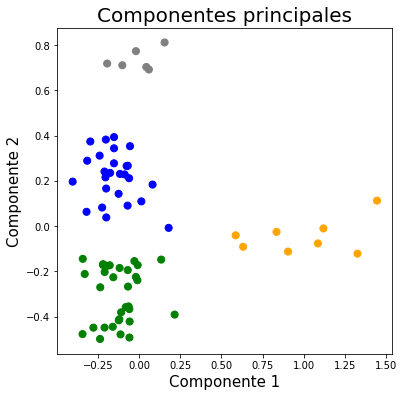

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(["blue","green","orange","gray"])
ax.scatter(x = pca_cluster_cada_df.Componente_1, y= pca_cluster_cada_df.Componente_2, c =color_theme[pca_cluster_cada_df.KMaens_cluster], s= 50 )
plt.show()

La maldición de la dimensión
curse of dimensionality.
Solución: Incrementar el tamaño del data set y por ende su densidad, pero al aumentarla se incrementa también el exponencialmente las dimensiones.

PCA crea una representación/proyección de baja dimensión de nuestro conjunto de datos, para esto se busca un plano que abarque la gran mayoría de datos. Cada componente es independiente y se maximiza la varianza, ya que se minimiza la distancia lo 


mahalanobis distance.
distancia multivariada.
indice de precio al consumidor IPC.
Datos atipicos multivarido.
multivariate mean python. 
correlacion canonica.


In [ ]:
https://github.com/krishnaik06/Silhouette-clustering-/blob/master/Untitled.ipynb
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
https://www.cs.ucdavis.edu/~filkov/classes/234-S08/secure/clustering.pdf
https://realpython.com/k-means-clustering-python/

In [ ]:
"""covariant_matrix = np.cov(x_train_std.T)

eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)

tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,6), var_exp, alpha=0.5, align='center',
label='cumulative explained variance')
ylabel('Explained variance ratio')
xlabel('Prinicipal components')
legend(loc='best')
show()

print(50 * '=')
print('Section: Feature Transformation')
print(50 * '-')

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i])
               for i in range(len(eigen_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)


eigen_pairs[:5]

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
# we want to transform the Wine dataset onto the new principal component axes.
# sorting the eigen-pairs by decreasing order of the eigenvalues:

# Next, we collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in 
# this dataset. we've created a 13×2 projection matrix from the top two eigenvectors.

x_train_pca = x_train_std.dot(w)
x_train_std.shape, w.shape, x_train_pca.shape

# In the same way, we can transform the entire 124×13 training dataset onto the two principal components by calculating 
# the matrix dot product:

print('Matrix W:\n', w)

x_train_pca = x_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    scatter(x_train_pca[y_train == l, 0],
                x_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

xlabel('PC 1')
ylabel('PC 2')
legend(loc='lower left')

plt.show()

# Finally, it's time to visualize the transformed Wine training set, now stored as an 124×2
# matrix, in a two-dimensional scatterplot:

print('Dot product:\n', x_train_std[0].dot(w))
"""

NameError: ignored

*https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9073959&gclid=Cj0KCQjw2tCGBhCLARIsABJGmZ56l2BhtLJPYOQcmU8aAb6IR7hGeZjB_lS5AJBEawIZ6OFrW3XUT9kaAseiEALw_wcB

*https://unipython.com/analisis-de-series-temporales-con-la-libreria-pandas/

*https://dfrieds.com/data-visualizations/visualize-historical-time-comparisons.html

*https://365datascience.com/tutorials/python-tutorials/pca-k-means/


In [ ]:
https://github.com/sejaldua/music-clustering/blob/master/notebook.ipynb
https://stackoverflow.com/questions/57226054/seaborn-correlation-matrix-with-p-values-with-python 